<h2 style="color:#006699;"><center> MTA Turnstile Data: Exploratory Data Analysis</center></h2>

<p style="color:maroon;">importing python libraries</p>

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os

<p style="color:maroon;">getting csv files from directory</p>

In [255]:
# df_raw = pd.DataFrame()
# files = [file for file in os.listdir('CSVFile/')]
# print(files)

<p style="color:maroon;">merging files and creating dataframe</p>

<p style="color:maroon;">between 04/16/2022 - 06/11/2022 time frame</p>

In [256]:
# for file in files:
#     df_file = pd.read_csv('CSVFile/'+ file)
#     df_raw = pd.concat([df_raw, df_file])

# df_raw.to_csv('CSVFile/df_raw_all.csv', index=False)

<p style="color:maroon;">getting information about dataframe</p>

In [257]:
df_raw = pd.read_csv('CSVFile/df_raw_all.csv')
df_raw.shape

(1689579, 11)

In [258]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689579 entries, 0 to 1689578
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype 
---  ------                                                                --------------    ----- 
 0   C/A                                                                   1689579 non-null  object
 1   UNIT                                                                  1689579 non-null  object
 2   SCP                                                                   1689579 non-null  object
 3   STATION                                                               1689579 non-null  object
 4   LINENAME                                                              1689579 non-null  object
 5   DIVISION                                                              1689579 non-null  object
 6   DATE                                                                  1689579 non-

<p style="color:maroon;"></p>

In [259]:
df_raw.duplicated().sum()

0

In [260]:
df_raw.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

<p style="color:maroon;">renaming the EXITS column's name</p>

In [261]:
df_raw.rename(columns={df_raw.columns[10]:'EXITS'}, inplace=True)

In [262]:
df_raw.nunique()

C/A             753
UNIT            470
SCP             224
STATION         379
LINENAME        114
DIVISION          6
DATE             56
TIME          44352
DESC              2
ENTRIES     1226076
EXITS       1180175
dtype: int64

In [263]:
df_raw

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/16/2022,00:00:00,REGULAR,7702257,2693154
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/16/2022,04:00:00,REGULAR,7702260,2693158
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/16/2022,08:00:00,REGULAR,7702266,2693179
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/16/2022,12:00:00,REGULAR,7702282,2693270
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/16/2022,16:00:00,REGULAR,7702325,2693324
...,...,...,...,...,...,...,...,...,...,...,...
1689574,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/10/2022,05:00:00,REGULAR,0,488
1689575,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/10/2022,09:00:00,REGULAR,0,488
1689576,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/10/2022,13:00:00,REGULAR,0,489
1689577,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/10/2022,17:00:00,REGULAR,0,490


<p style="color:maroon;">merging C/A, UNIT, SCP columns into TURNSTILE column<br>
DATE and TIME columns into DATETIME column</p>

In [264]:
df_raw['TURNSTILE']=df_raw['C/A']+' '+df_raw['UNIT']+' '+df_raw['SCP']
df_raw['DATETIME']=df_raw['DATE']+' '+df_raw['TIME']

In [265]:
df_raw.sort_values(["TURNSTILE",'DATETIME'], inplace=True) 

In [266]:
df_raw['DATE']=pd.to_datetime(df_raw['DATE'].astype(str), format='%m/%d/%Y') #chaging date format, define date format via format=''

<p style="color:maroon;">removing C/A, UNIT and SCP columns from our dataframe</p>

In [267]:
df_raw.drop(columns=['C/A','UNIT','SCP','DATETIME'], axis=1, inplace=True)

<p style="color:maroon;">getting the name of the days from DATE column</p>

In [268]:
df_raw['DAYOFWEEK'] = df_raw['DATE'].dt.day_name() # getting day name of date

In [269]:
df_raw

,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DAYOFWEEK
0,59 ST,NQR456W,BMT,2022-04-16,00:00:00,REGULAR,7702257,2693154,A002 R051 02-00-00,Saturday
1,59 ST,NQR456W,BMT,2022-04-16,04:00:00,REGULAR,7702260,2693158,A002 R051 02-00-00,Saturday
2,59 ST,NQR456W,BMT,2022-04-16,08:00:00,REGULAR,7702266,2693179,A002 R051 02-00-00,Saturday
3,59 ST,NQR456W,BMT,2022-04-16,12:00:00,REGULAR,7702282,2693270,A002 R051 02-00-00,Saturday
4,59 ST,NQR456W,BMT,2022-04-16,16:00:00,REGULAR,7702325,2693324,A002 R051 02-00-00,Saturday
...,...,...,...,...,...,...,...,...,...,...
1689574,RIT-ROOSEVELT,R,RIT,2022-06-10,05:00:00,REGULAR,0,488,TRAM2 R469 00-05-01,Friday
1689575,RIT-ROOSEVELT,R,RIT,2022-06-10,09:00:00,REGULAR,0,488,TRAM2 R469 00-05-01,Friday
1689576,RIT-ROOSEVELT,R,RIT,2022-06-10,13:00:00,REGULAR,0,489,TRAM2 R469 00-05-01,Friday
1689577,RIT-ROOSEVELT,R,RIT,2022-06-10,17:00:00,REGULAR,0,490,TRAM2 R469 00-05-01,Friday


In [270]:
df_raw.DESC.value_counts()

REGULAR       1682691
RECOVR AUD       6888
Name: DESC, dtype: int64

In [271]:
df_raw=df_raw[df_raw['DESC']=='REGULAR'] # "RECOVR AUD" attributes has dropped. Rows' DESC is only REGULAR type.

In [272]:
df_raw.drop(columns=['DESC'], axis=1, inplace=True)

/var/folders/k3/j6jq_f1515z33j6b0qgnkwt00000gn/T/ipykernel_3530/1305300828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw.drop(columns=['DESC'], axis=1, inplace=True)


In [273]:
df_raw.head()

,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,TURNSTILE,DAYOFWEEK
0,59 ST,NQR456W,BMT,2022-04-16,00:00:00,7702257,2693154,A002 R051 02-00-00,Saturday
1,59 ST,NQR456W,BMT,2022-04-16,04:00:00,7702260,2693158,A002 R051 02-00-00,Saturday
2,59 ST,NQR456W,BMT,2022-04-16,08:00:00,7702266,2693179,A002 R051 02-00-00,Saturday
3,59 ST,NQR456W,BMT,2022-04-16,12:00:00,7702282,2693270,A002 R051 02-00-00,Saturday
4,59 ST,NQR456W,BMT,2022-04-16,16:00:00,7702325,2693324,A002 R051 02-00-00,Saturday


<p style="color:maroon;">finding the difference between two following entries for EXITS and ENTIRIES columns</p>

In [274]:
df_raw.reset_index(drop=True, inplace=True)
df_raw['DIFF.ENTRIES'] = df_raw['ENTRIES'].diff()
df_raw['DIFF.EXITS'] = df_raw['EXITS'].diff()
df_raw.drop(columns=['ENTRIES'], axis=1, inplace=True)
df_raw.drop(columns=['EXITS'], axis=1, inplace=True)

/var/folders/k3/j6jq_f1515z33j6b0qgnkwt00000gn/T/ipykernel_3530/1918954283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['DIFF.ENTRIES'] = df_raw['ENTRIES'].diff()
/var/folders/k3/j6jq_f1515z33j6b0qgnkwt00000gn/T/ipykernel_3530/1918954283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['DIFF.EXITS'] = df_raw['EXITS'].diff()
/var/folders/k3/j6jq_f1515z33j6b0qgnkwt00000gn/T/ipykernel_3530/1918954283.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [275]:
df_raw

,STATION,LINENAME,DIVISION,DATE,TIME,TURNSTILE,DAYOFWEEK,DIFF.ENTRIES,DIFF.EXITS
0,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-00-00,Saturday,NaN,NaN
1,59 ST,NQR456W,BMT,2022-04-16,04:00:00,A002 R051 02-00-00,Saturday,3.0,4.0
2,59 ST,NQR456W,BMT,2022-04-16,08:00:00,A002 R051 02-00-00,Saturday,6.0,21.0
3,59 ST,NQR456W,BMT,2022-04-16,12:00:00,A002 R051 02-00-00,Saturday,16.0,91.0
4,59 ST,NQR456W,BMT,2022-04-16,16:00:00,A002 R051 02-00-00,Saturday,43.0,54.0
...,...,...,...,...,...,...,...,...,...
1682686,RIT-ROOSEVELT,R,RIT,2022-06-10,05:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0
1682687,RIT-ROOSEVELT,R,RIT,2022-06-10,09:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0
1682688,RIT-ROOSEVELT,R,RIT,2022-06-10,13:00:00,TRAM2 R469 00-05-01,Friday,0.0,1.0
1682689,RIT-ROOSEVELT,R,RIT,2022-06-10,17:00:00,TRAM2 R469 00-05-01,Friday,0.0,1.0


In [276]:
df_raw.drop(index=0, inplace=True) # The row has "NaN" has been dropped.

/var/folders/k3/j6jq_f1515z33j6b0qgnkwt00000gn/T/ipykernel_3530/1090700148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw.drop(index=0, inplace=True) # The row has "NaN" has been dropped.


In [277]:
df_raw.head()

,STATION,LINENAME,DIVISION,DATE,TIME,TURNSTILE,DAYOFWEEK,DIFF.ENTRIES,DIFF.EXITS
1,59 ST,NQR456W,BMT,2022-04-16,04:00:00,A002 R051 02-00-00,Saturday,3.0,4.0
2,59 ST,NQR456W,BMT,2022-04-16,08:00:00,A002 R051 02-00-00,Saturday,6.0,21.0
3,59 ST,NQR456W,BMT,2022-04-16,12:00:00,A002 R051 02-00-00,Saturday,16.0,91.0
4,59 ST,NQR456W,BMT,2022-04-16,16:00:00,A002 R051 02-00-00,Saturday,43.0,54.0
5,59 ST,NQR456W,BMT,2022-04-16,20:00:00,A002 R051 02-00-00,Saturday,56.0,44.0


<p style="color:maroon;">
<em> There are three problems regarding the values in "DIFF.ENTRIES","DIFF.EXITS,"TRAFFIC" columns.</em></p>

    . positive too much values
    . negative values 
    . some zero values
    
<p style="color:maroon;">If a passanger passes a turstile in 3 second, max. 4800 passangers can pass a turstile in 4-hours.
 </p>

In [278]:
df_raw[ (df_raw['DIFF.ENTRIES'] < 0) | (df_raw['DIFF.EXITS'] < 0)] # negative values

,STATION,LINENAME,DIVISION,DATE,TIME,TURNSTILE,DAYOFWEEK,DIFF.ENTRIES,DIFF.EXITS
336,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-00-01,Saturday,-905546.0,-1126217.0
672,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-03-00,Saturday,-5341071.0,4123185.0
1008,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-03-01,Saturday,251689.0,-2971901.0
1344,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-03-02,Saturday,-1619341.0,-2623527.0
2016,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-03-04,Saturday,1376166.0,-3192512.0
...,...,...,...,...,...,...,...,...,...
1680000,RIT-MANHATTAN,R,RIT,2022-04-16,01:00:00,TRAM1 R468 00-00-02,Saturday,-347872.0,129623.0
1680336,RIT-MANHATTAN,R,RIT,2022-04-16,01:00:00,TRAM1 R468 00-05-00,Saturday,-450472.0,-142811.0
1681343,RIT-ROOSEVELT,R,RIT,2022-04-16,01:00:00,TRAM2 R469 00-03-00,Saturday,-3308134.0,-26774.0
1682017,RIT-ROOSEVELT,R,RIT,2022-04-16,01:00:00,TRAM2 R469 00-05-00,Saturday,-2881567.0,-402452.0


In [279]:
df_raw[ (df_raw['DIFF.ENTRIES'] > 4800) | (df_raw['DIFF.EXITS'] > 4800)] # too much number of passangers

,STATION,LINENAME,DIVISION,DATE,TIME,TURNSTILE,DAYOFWEEK,DIFF.ENTRIES,DIFF.EXITS
672,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-03-00,Saturday,-5341071.0,4123185.0
1008,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-03-01,Saturday,251689.0,-2971901.0
1680,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-03-03,Saturday,6088392.0,6863120.0
2016,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-03-04,Saturday,1376166.0,-3192512.0
2352,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-03-05,Saturday,4687242.0,-2519705.0
...,...,...,...,...,...,...,...,...,...
1679328,RIT-MANHATTAN,R,RIT,2022-04-16,01:00:00,TRAM1 R468 00-00-00,Saturday,1345260.0,30186.0
1680000,RIT-MANHATTAN,R,RIT,2022-04-16,01:00:00,TRAM1 R468 00-00-02,Saturday,-347872.0,129623.0
1680669,RIT-ROOSEVELT,R,RIT,2022-04-16,01:00:00,TRAM2 R469 00-00-00,Saturday,1115858.0,28716.0
1681006,RIT-ROOSEVELT,R,RIT,2022-04-16,01:00:00,TRAM2 R469 00-00-01,Saturday,2836495.0,27695.0


In [280]:
df_raw[ (df_raw['DIFF.ENTRIES'] == 0) & (df_raw['DIFF.EXITS'] == 0)] # finding 0 values

,STATION,LINENAME,DIVISION,DATE,TIME,TURNSTILE,DAYOFWEEK,DIFF.ENTRIES,DIFF.EXITS
2029,59 ST,NQR456W,BMT,2022-04-18,04:00:00,A002 R051 02-03-04,Monday,0.0,0.0
3026,59 ST,NQR456W,BMT,2022-04-16,08:00:00,A002 R051 02-05-00,Saturday,0.0,0.0
3027,59 ST,NQR456W,BMT,2022-04-16,12:00:00,A002 R051 02-05-00,Saturday,0.0,0.0
3031,59 ST,NQR456W,BMT,2022-04-17,04:00:00,A002 R051 02-05-00,Sunday,0.0,0.0
3032,59 ST,NQR456W,BMT,2022-04-17,08:00:00,A002 R051 02-05-00,Sunday,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1682681,RIT-ROOSEVELT,R,RIT,2022-06-09,09:00:00,TRAM2 R469 00-05-01,Thursday,0.0,0.0
1682682,RIT-ROOSEVELT,R,RIT,2022-06-09,13:00:00,TRAM2 R469 00-05-01,Thursday,0.0,0.0
1682683,RIT-ROOSEVELT,R,RIT,2022-06-09,17:00:00,TRAM2 R469 00-05-01,Thursday,0.0,0.0
1682686,RIT-ROOSEVELT,R,RIT,2022-06-10,05:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0


In [281]:
df=df_raw[((df_raw['DIFF.ENTRIES']>=0) & (df_raw['DIFF.EXITS']>=0)) & ((df_raw['DIFF.ENTRIES']<=4800) & (df_raw['DIFF.EXITS']<=4800))]
print("Raw Data Rows:",df_raw.shape[0])
print("Extracted Data Rows:",df.shape[0])
print("Eliminated Data Rows:",df_raw.shape[0]-df.shape[0])
difference = df_raw.shape[0]-df.shape[0]
print("Elimineted Rows (%):",((difference*100)/df_raw.shape[0]))


Raw Data Rows: 1682690
Extracted Data Rows: 1657052
Eliminated Data Rows: 25638
Elimineted Rows (%): 1.5236318038379024


<p style="color:maroon;">after cleaning the outliner data</p>

In [282]:
df.reset_index(drop=True, inplace=True)

df 

,STATION,LINENAME,DIVISION,DATE,TIME,TURNSTILE,DAYOFWEEK,DIFF.ENTRIES,DIFF.EXITS
0,59 ST,NQR456W,BMT,2022-04-16,04:00:00,A002 R051 02-00-00,Saturday,3.0,4.0
1,59 ST,NQR456W,BMT,2022-04-16,08:00:00,A002 R051 02-00-00,Saturday,6.0,21.0
2,59 ST,NQR456W,BMT,2022-04-16,12:00:00,A002 R051 02-00-00,Saturday,16.0,91.0
3,59 ST,NQR456W,BMT,2022-04-16,16:00:00,A002 R051 02-00-00,Saturday,43.0,54.0
4,59 ST,NQR456W,BMT,2022-04-16,20:00:00,A002 R051 02-00-00,Saturday,56.0,44.0
...,...,...,...,...,...,...,...,...,...
1657047,RIT-ROOSEVELT,R,RIT,2022-06-10,05:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0
1657048,RIT-ROOSEVELT,R,RIT,2022-06-10,09:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0
1657049,RIT-ROOSEVELT,R,RIT,2022-06-10,13:00:00,TRAM2 R469 00-05-01,Friday,0.0,1.0
1657050,RIT-ROOSEVELT,R,RIT,2022-06-10,17:00:00,TRAM2 R469 00-05-01,Friday,0.0,1.0


<p style="color:maroon;">getting traffic numbers for each row</p>

In [283]:
df['TRAFFIC'] = df['DIFF.ENTRIES'] + df['DIFF.EXITS']


/var/folders/k3/j6jq_f1515z33j6b0qgnkwt00000gn/T/ipykernel_3530/3000482103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TRAFFIC'] = df['DIFF.ENTRIES'] + df['DIFF.EXITS']


In [284]:
df

,STATION,LINENAME,DIVISION,DATE,TIME,TURNSTILE,DAYOFWEEK,DIFF.ENTRIES,DIFF.EXITS,TRAFFIC
0,59 ST,NQR456W,BMT,2022-04-16,04:00:00,A002 R051 02-00-00,Saturday,3.0,4.0,7.0
1,59 ST,NQR456W,BMT,2022-04-16,08:00:00,A002 R051 02-00-00,Saturday,6.0,21.0,27.0
2,59 ST,NQR456W,BMT,2022-04-16,12:00:00,A002 R051 02-00-00,Saturday,16.0,91.0,107.0
3,59 ST,NQR456W,BMT,2022-04-16,16:00:00,A002 R051 02-00-00,Saturday,43.0,54.0,97.0
4,59 ST,NQR456W,BMT,2022-04-16,20:00:00,A002 R051 02-00-00,Saturday,56.0,44.0,100.0
...,...,...,...,...,...,...,...,...,...,...
1657047,RIT-ROOSEVELT,R,RIT,2022-06-10,05:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0,0.0
1657048,RIT-ROOSEVELT,R,RIT,2022-06-10,09:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0,0.0
1657049,RIT-ROOSEVELT,R,RIT,2022-06-10,13:00:00,TRAM2 R469 00-05-01,Friday,0.0,1.0,1.0
1657050,RIT-ROOSEVELT,R,RIT,2022-06-10,17:00:00,TRAM2 R469 00-05-01,Friday,0.0,1.0,1.0


<p style="color:maroon;">visualizing the data with bar charts</p>

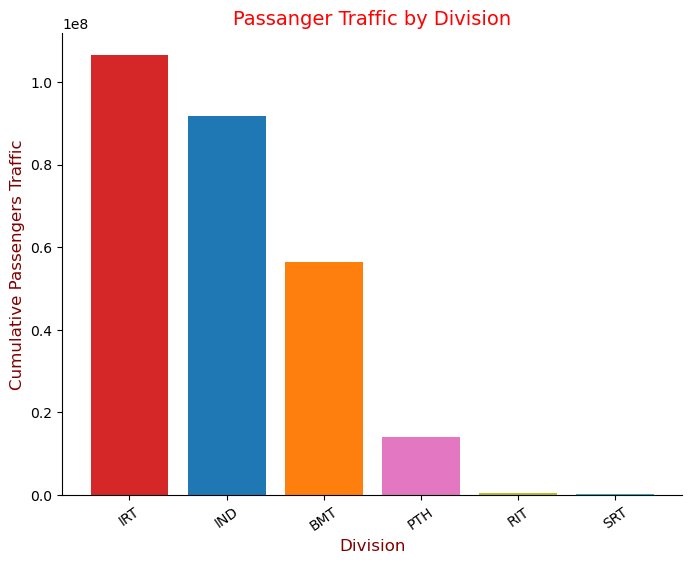

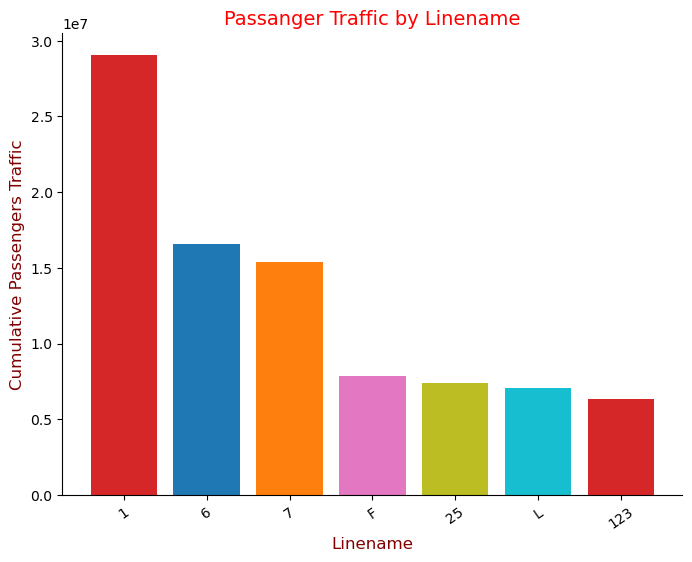

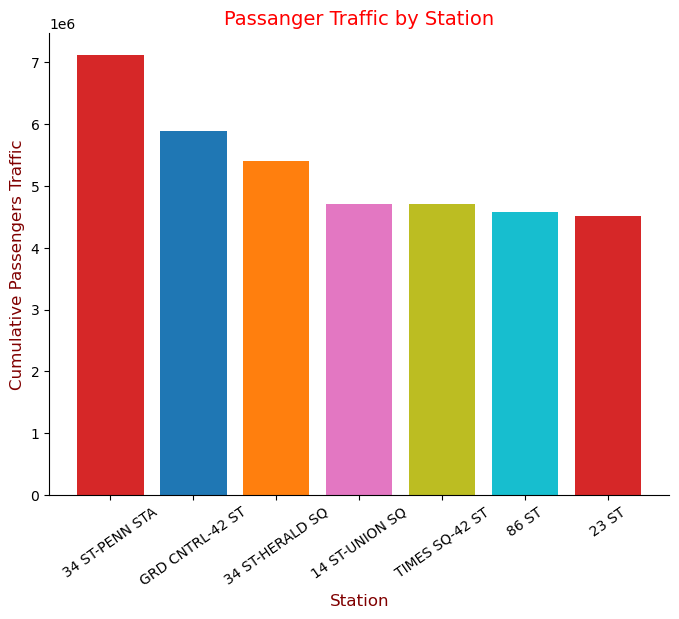

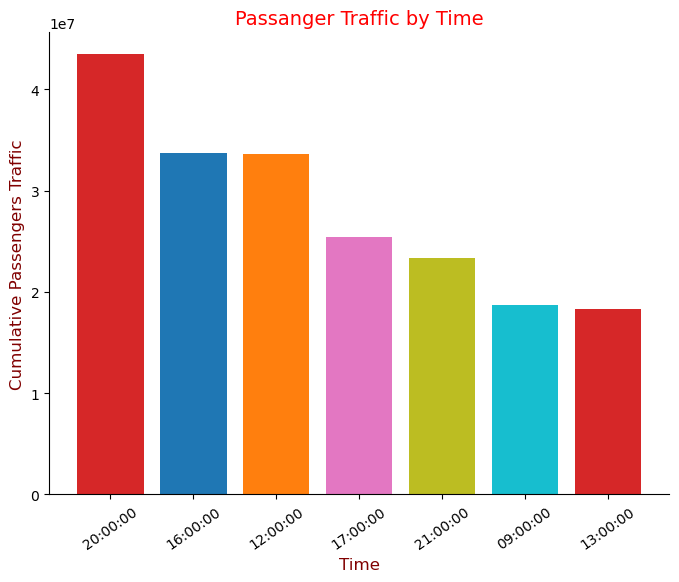

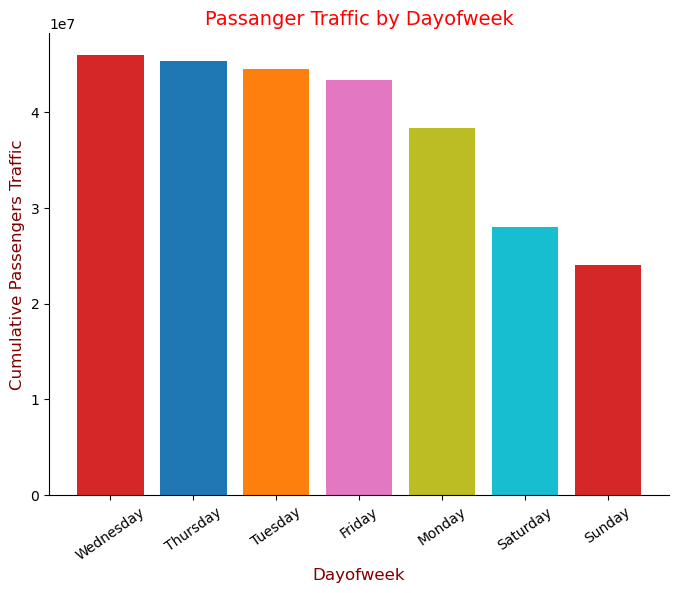

In [285]:
bar_colors = ['tab:red', 'tab:blue', 'tab:orange','tab:pink','tab:olive', 'tab:cyan' ]
chart_list = ['DIVISION','LINENAME','STATION','TIME','DAYOFWEEK']

i=0
for chart in chart_list:
    
    chart=df.groupby(chart)[['DIFF.ENTRIES','DIFF.EXITS','TRAFFIC']].sum()
    chart.sort_values('TRAFFIC',ascending=False,inplace=True)
    chart.reset_index(inplace=True)
    
    plt.figure(figsize=(8,6))
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(rotation = 35)
    title = str.title(chart_list[i])
    plt.xlabel(title, color='maroon', fontsize=12)
    plt.ylabel('Cumulative Passengers Traffic' , color='maroon', fontsize=12)
    plt.title('Passanger Traffic by '+title, color="red", fontsize=14)
    plt.bar(chart[chart_list[i]][0:7],chart["TRAFFIC"][0:7],color=bar_colors)
    plt.show()
    i+=1


<p style="color:maroon;">getting weekly traffic</p>

In [286]:
daily=df.groupby(['DATE','STATION'])[['TRAFFIC','STATION']].sum()
daily.sort_values(['DATE','STATION'],ascending=False,inplace=True)
daily.reset_index(inplace=True)

In [287]:
df_weekly_resample = daily.resample("W-SAT", on="DATE").sum()
df_weekly_resample.sort_values(['DATE'],ascending=False,inplace=True)
df_weekly_resample.reset_index(inplace=True)

In [288]:
df_weekly_resample

,DATE,TRAFFIC
0,2022-06-11,31128975.0
1,2022-06-04,32114865.0
2,2022-05-28,34225183.0
3,2022-05-21,35461715.0
4,2022-05-14,34429069.0
5,2022-05-07,33491898.0
6,2022-04-30,34207650.0
7,2022-04-23,31494231.0
8,2022-04-16,2987300.0


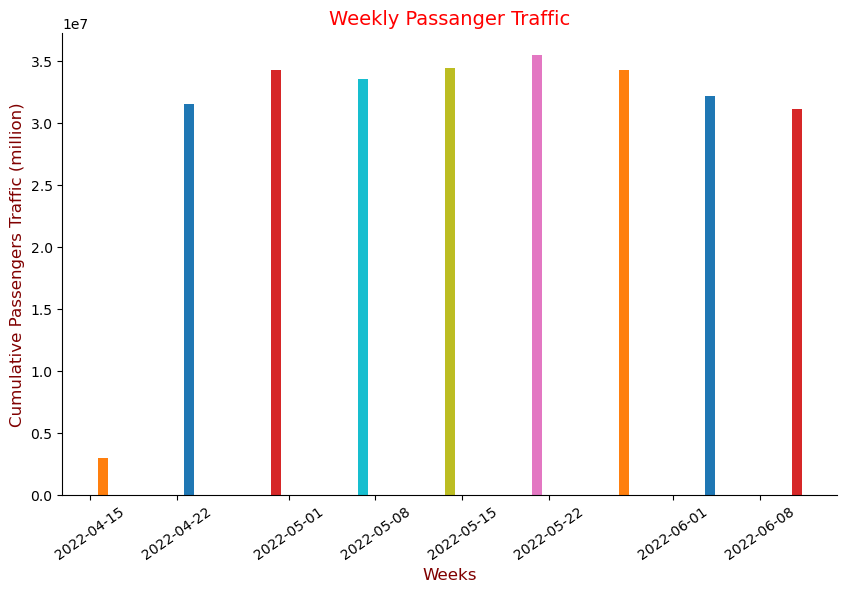

In [300]:
plt.figure(figsize=(10,6))
plt.ylabel('Cumulative Passengers Traffic (million)',color='maroon', fontsize=12)
plt.xlabel('Weeks', color='maroon', fontsize=12)
plt.title('Weekly Passanger Traffic', color='red', fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation=35 )
plt.bar(df_weekly_resample['DATE'], df_weekly_resample["TRAFFIC"], color=bar_colors)
plt.show()

<p style="color:maroon;">the busiest days and hours charts for top 5 stations</p>


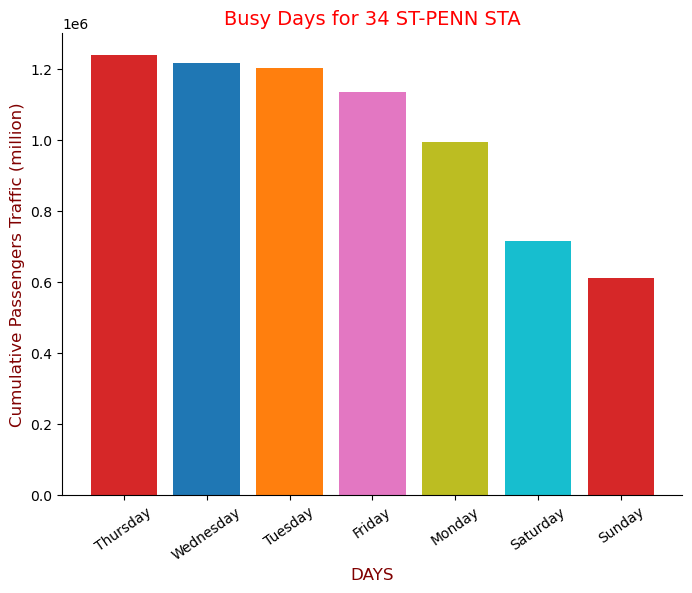

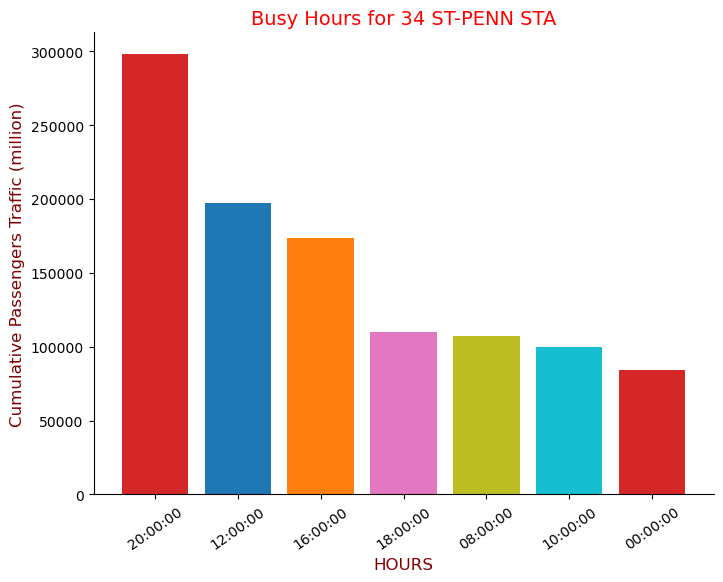

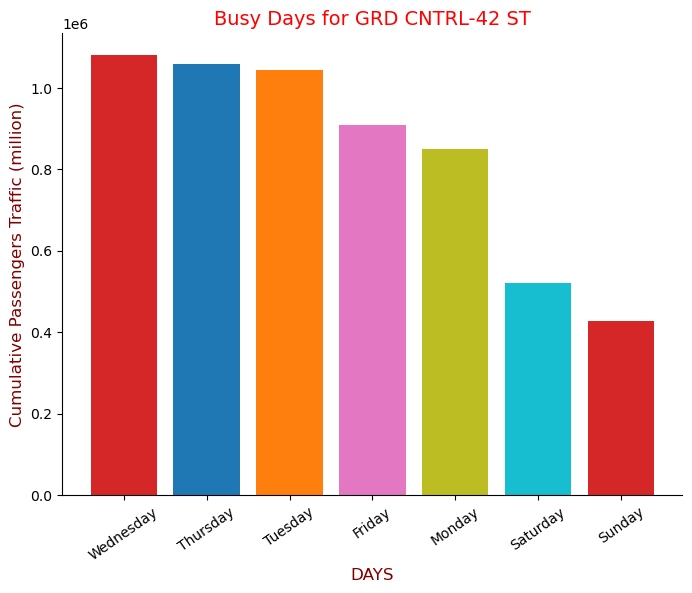

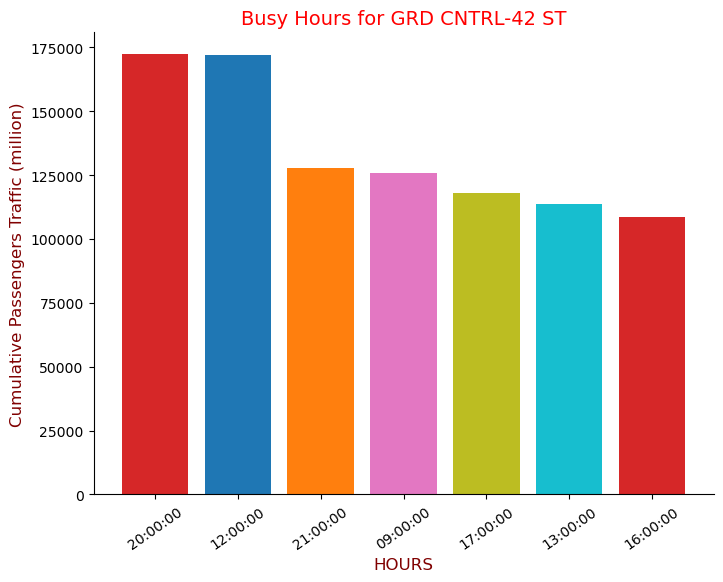

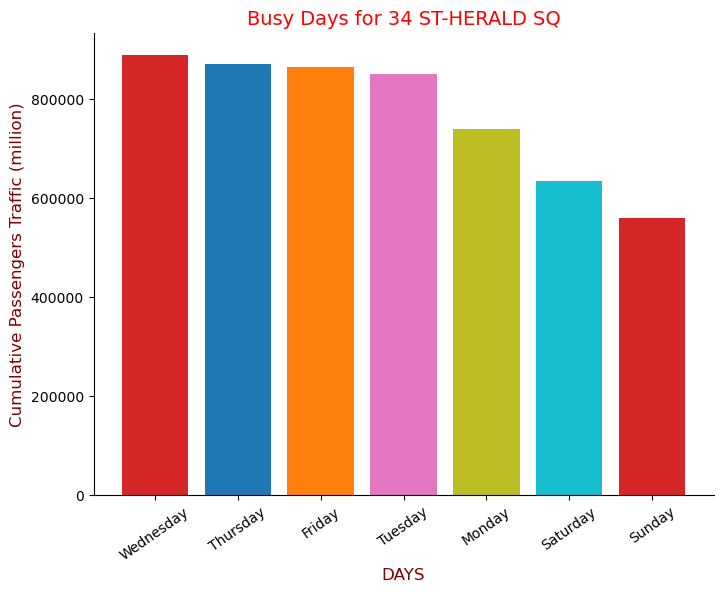

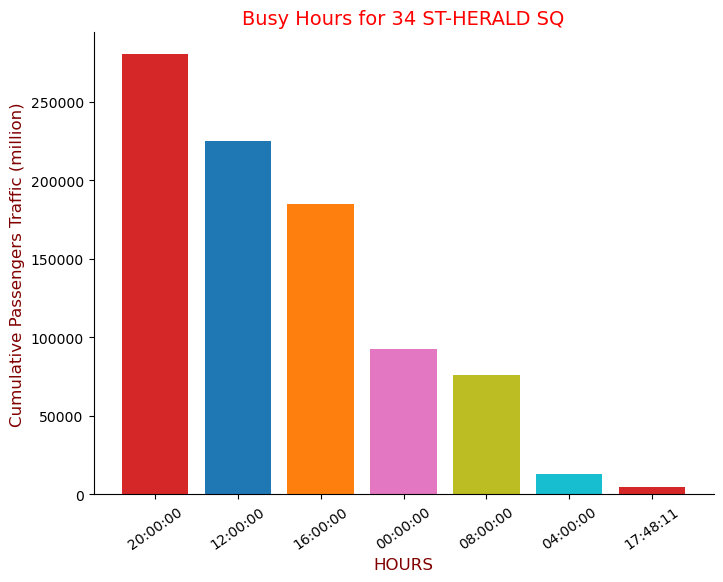

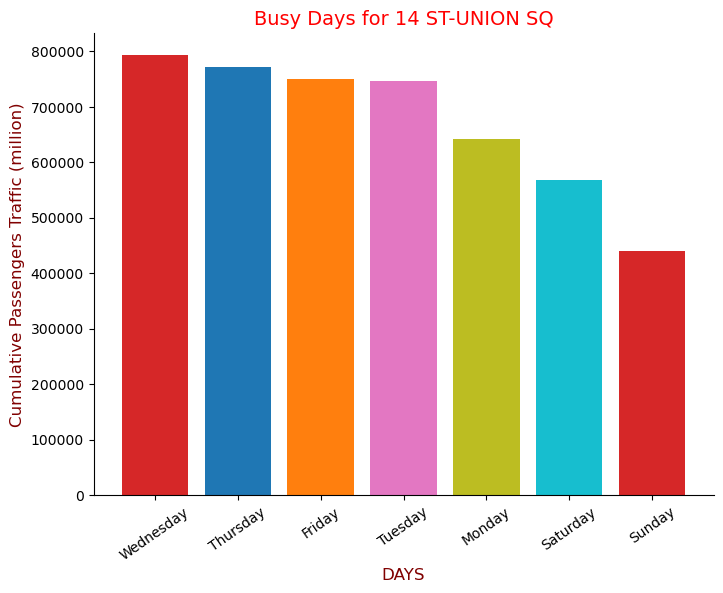

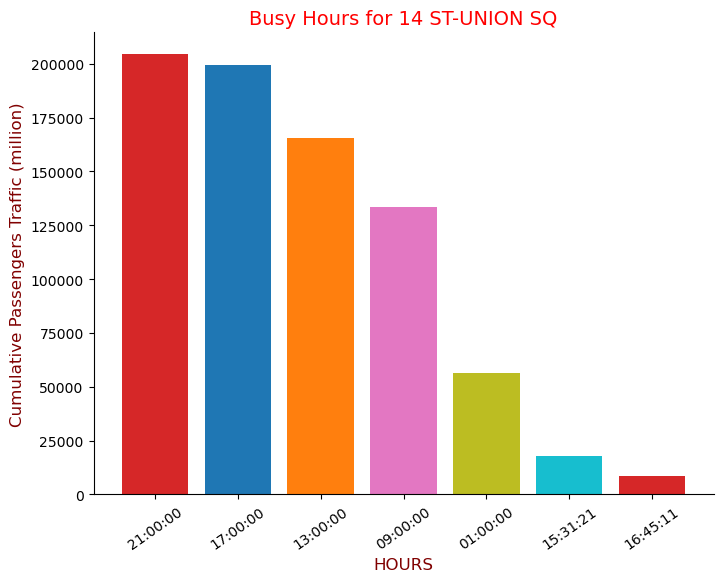

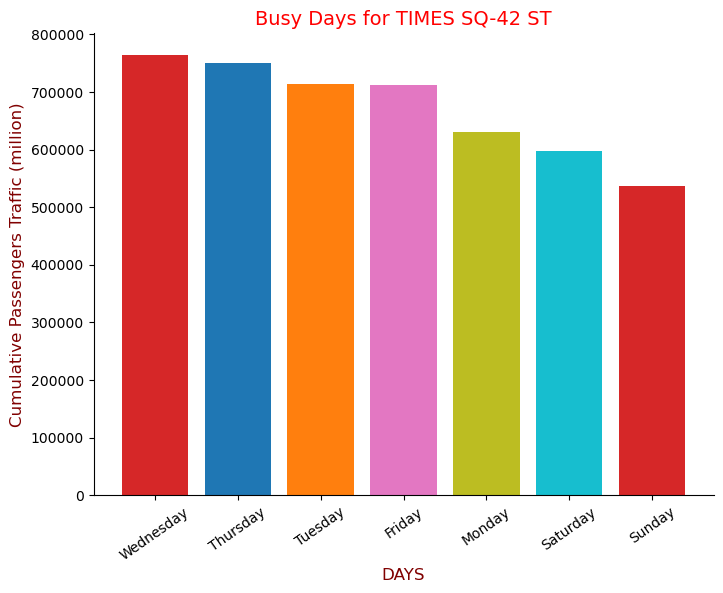

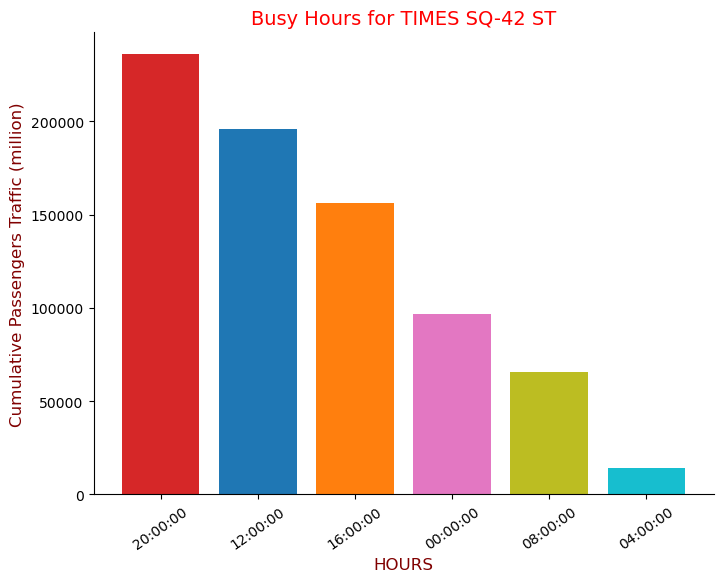

In [301]:
station_list = ['34 ST-PENN STA','GRD CNTRL-42 ST','34 ST-HERALD SQ','14 ST-UNION SQ','TIMES SQ-42 ST']


for station in station_list:
    
    data = df[df["STATION"] == station ].groupby("DAYOFWEEK")[["TRAFFIC","DAYOFWEEK"]].sum()
    data.sort_values(['TRAFFIC'],ascending=False, inplace=True)
    data.reset_index(inplace=True)
    
    day = data.iloc[0]['DAYOFWEEK']
    
    plt.figure(figsize=(8,6))
    plt.title('Busy Days for '+station, fontsize=14, color="red")
    plt.xlabel('DAYS', fontsize=12, color="maroon") 
    plt.ylabel('Cumulative Passengers Traffic (million)', fontsize=12, color="maroon")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(rotation=35 )
    plt.bar(data['DAYOFWEEK'], data['TRAFFIC'], color=bar_colors)
    plt.show()
    
    data = df[(df["STATION"] == station) &(df["DAYOFWEEK"] == day)].groupby("TIME")[["TRAFFIC","TIME"]].sum()
    data.sort_values(['TRAFFIC'],ascending=False, inplace=True)
    data.reset_index(inplace=True)
    
    plt.figure(figsize=(8,6))
    plt.title('Busy Hours for '+station, fontsize=14, color="red")
    plt.xlabel('HOURS', fontsize=12, color="maroon") 
    plt.ylabel('Cumulative Passengers Traffic (million)', fontsize=12, color="maroon")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(rotation=35 )
    plt.bar(data['TIME'][:7], data['TRAFFIC'][:7], color=bar_colors)
    plt.show()

<p style="color:maroon;">Conclusion :</p>

<p style="color:maroon;"> The busiest station is 34 ST- Penn Station.
The busiest day in 34 St-Penn Station is Thursday and busiest hour is between 12:00-20:00pm .</p>